In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

In [7]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=localhost;"
    "Database=SalesAnalyticsDB;"
    "Trusted_Connection=yes;"
)

print("Connected successfully!")

OperationalError: ('08001', '[08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]SQL Server does not exist or access denied. (17) (SQLDriverConnect); [08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionOpen (Connect()). (5)')

In [8]:
import pyodbc

SERVER = r"FAHIMUZZAMAN76"   # <-- from your SSMS left panel (server name)
DATABASE = "SalesAnalyticsDB"

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={SERVER};"
    f"DATABASE={DATABASE};"
    "Trusted_Connection=yes;"
)

print("Connected successfully!")

Connected successfully!


In [9]:
query = """
SELECT TOP 10
    p.ProductName,
    SUM(oi.Sales) AS TotalSales
FROM dbo.OrderItems oi
JOIN dbo.Products p ON oi.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalSales DESC;
"""

df_top_products = pd.read_sql(query, conn)
df_top_products

C:\Users\fahim\AppData\Local\Temp\ipykernel_13388\837972428.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql(query, conn)


,ProductName,TotalSales
0,Canon imageCLASS 2200 Advanced Copier,61599.83
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.57
4,GBC DocuBind TL300 Electric Binding System,19823.47
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
6,Hewlett Packard LaserJet 3310 Copier,18839.68
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
8,GBC DocuBind P400 Electric Binding System,17965.07
9,High Speed Automatic Electric Letter Opener,17030.31


C:\Users\fahim\AppData\Local\Temp\ipykernel_13388\2453653956.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


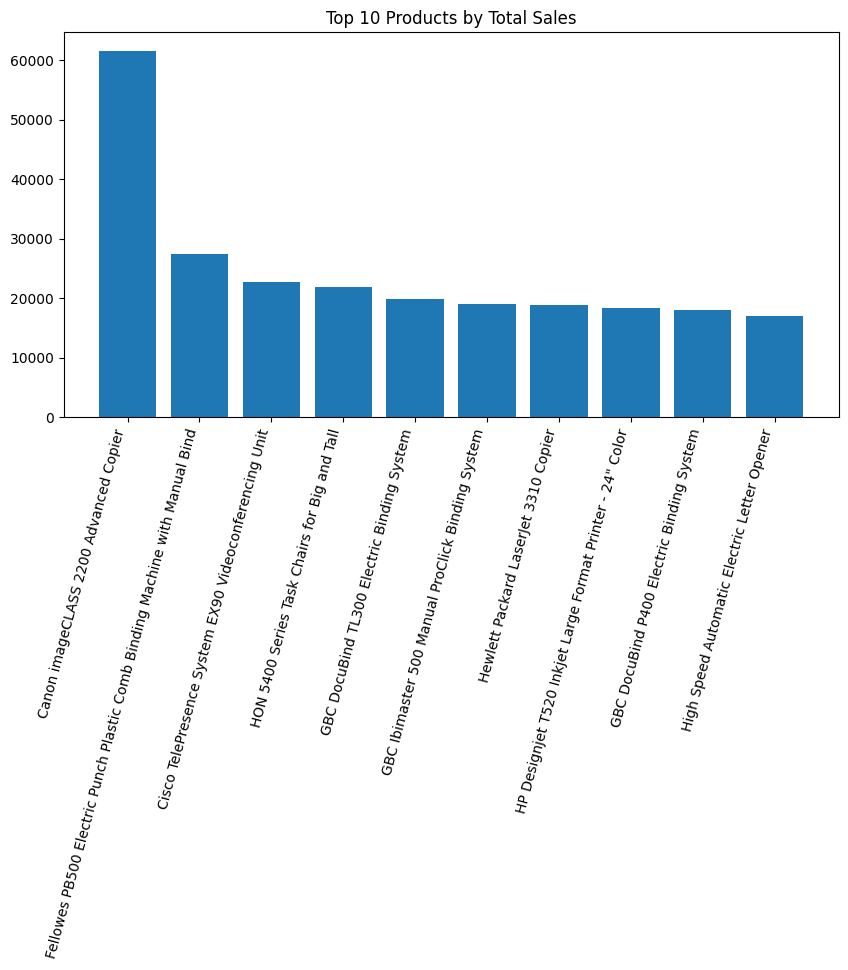

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df_top_products["ProductName"], df_top_products["TotalSales"])
plt.xticks(rotation=75, ha="right")
plt.title("Top 10 Products by Total Sales")
plt.tight_layout()
plt.show()

In [11]:
query_region_profit = """
SELECT 
    l.Region,
    SUM(oi.Profit) AS TotalProfit
FROM dbo.OrderItems oi
JOIN dbo.Orders o ON oi.OrderID = o.OrderID
JOIN dbo.Location l ON o.LocationID = l.LocationID
GROUP BY l.Region
ORDER BY TotalProfit DESC;
"""

df_region_profit = pd.read_sql(query_region_profit, conn)
df_region_profit

C:\Users\fahim\AppData\Local\Temp\ipykernel_13388\3110847741.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region_profit = pd.read_sql(query_region_profit, conn)


,Region,TotalProfit
0,West,108418.32
1,East,91522.50
2,South,47169.48
3,Central,39706.26


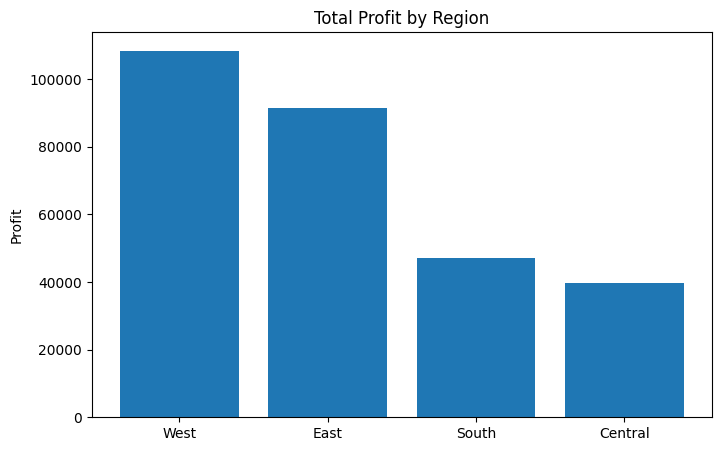

In [12]:
plt.figure(figsize=(8,5))
plt.bar(df_region_profit["Region"], df_region_profit["TotalProfit"])
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.show()

In [13]:
query_monthly_sales = """
SELECT 
    FORMAT(o.OrderDate, 'yyyy-MM') AS OrderMonth,
    SUM(oi.Sales) AS TotalSales
FROM dbo.OrderItems oi
JOIN dbo.Orders o ON oi.OrderID = o.OrderID
GROUP BY FORMAT(o.OrderDate, 'yyyy-MM')
ORDER BY OrderMonth;
"""

df_monthly_sales = pd.read_sql(query_monthly_sales, conn)
df_monthly_sales

C:\Users\fahim\AppData\Local\Temp\ipykernel_13388\15350283.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly_sales = pd.read_sql(query_monthly_sales, conn)


,OrderMonth,TotalSales
0,2014-01,14236.90
1,2014-02,4519.92
2,2014-03,55691.04
3,2014-04,28295.35
4,2014-05,23648.26
5,2014-06,34595.12
6,2014-07,33946.37
7,2014-08,27909.47
8,2014-09,81777.32
9,2014-10,31453.37


In [14]:
df_monthly_sales["OrderMonth"] = pd.to_datetime(df_monthly_sales["OrderMonth"])

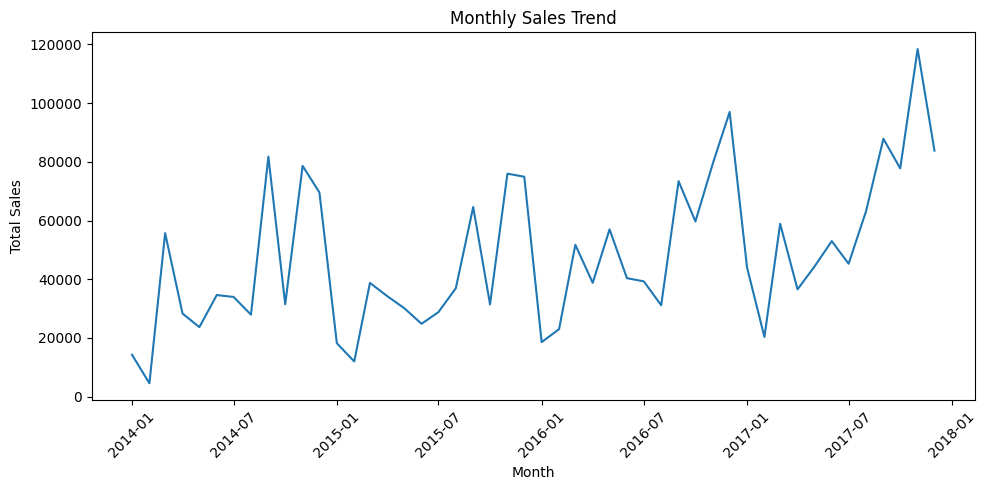

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_monthly_sales["OrderMonth"], df_monthly_sales["TotalSales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

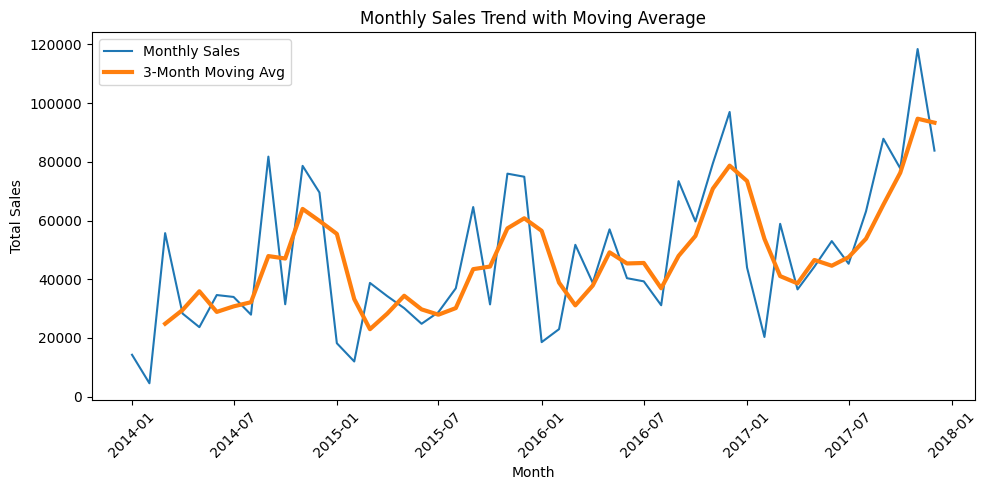

In [16]:
df_monthly_sales["MovingAvg"] = df_monthly_sales["TotalSales"].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(df_monthly_sales["OrderMonth"], df_monthly_sales["TotalSales"], label="Monthly Sales")
plt.plot(df_monthly_sales["OrderMonth"], df_monthly_sales["MovingAvg"], label="3-Month Moving Avg", linewidth=3)
plt.title("Monthly Sales Trend with Moving Average")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
conn.close()
print("Connection closed.")

Connection closed.
